# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#Statmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
target = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q9/actual.csv')
train = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q9/data_set_ALL_AML_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q9/data_set_ALL_AML_test.csv')

In [3]:
train.shape, test.shape, target.shape

((7129, 78), (7129, 70), (72, 2))

In [4]:
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


# Part a

In [5]:
train_cols = ["call."+str(i) for i in range(1, 38)]
train_cols.extend(['Gene Description', 'Gene Accession Number', 'call'])

test_cols = ["call."+str(i) for i in range(1, 34)]
test_cols.extend(['Gene Description', 'Gene Accession Number', 'call'])

In [6]:
train.drop(train_cols, axis=1, inplace=True)
test.drop(test_cols, axis=1, inplace=True)
train.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,88,283,309,12,168,71,55,-2,268,219,...,132,318,325,392,241,193,312,230,330,337
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [7]:
test.head()

,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
0,-342,-87,22,-243,-130,-256,-62,86,-146,-187,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,41,262,17,-163,-28,-410,-7,-141,170,312,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,328,295,276,182,266,24,142,252,174,142,...,319,178,340,31,396,141,95,146,431,9
4,-224,-226,-211,-289,-170,-535,-233,-201,-32,114,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [8]:
train.shape, test.shape

((7129, 38), (7129, 34))

# Part b

concat train and test --> 72 patients

In [9]:
train = train.T
test = test.T
df = pd.concat([train, test])
train.shape, test.shape, df.shape, target.shape

((38, 7129), (34, 7129), (72, 7129), (72, 2))

It's better to drop patient column which contains each patient ID

In [10]:
target.drop('patient', axis=1, inplace=True)

convert target to series

In [11]:
target = target.squeeze()
target

0     ALL
1     ALL
2     ALL
3     ALL
4     ALL
     ... 
67    ALL
68    ALL
69    ALL
70    ALL
71    ALL
Name: cancer, Length: 72, dtype: object

Reset df indexes as well

In [12]:
df.reset_index(drop=True, inplace=True)

Concat df and target

In [13]:
df_final = pd.concat([df, target], axis=1, ignore_index=True)
df_final.shape

(72, 7130)

In [14]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,ALL
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,ALL
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,ALL
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,ALL
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-62,-198,-5,141,-256,-206,-298,-218,-14,100,...,532,-34,239,-78,707,354,-22,260,5,ALL
68,-58,-217,63,95,-191,-230,-86,-152,-6,-249,...,297,36,358,2,423,41,0,1777,-49,ALL
69,-161,-215,-46,146,-172,-596,-122,-341,171,-147,...,639,-27,548,-39,809,445,-2,210,16,ALL
70,-48,-531,-124,431,-496,-696,-1038,-441,235,157,...,1141,-121,197,-108,466,349,0,284,-73,ALL


# Part c

In [20]:
X = df_final.drop(df_final.columns[7129], axis=1).to_numpy()
y = df_final[7129].to_numpy()
X.shape, y.shape

((72, 7129), (72,))

In [21]:
X_train = X[:38, :]
X_test = X[38:, :]
y_train = y[:38] 
y_test = y[38:] 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 7129), (34, 7129), (38,), (34,))

In [32]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(72, 2)

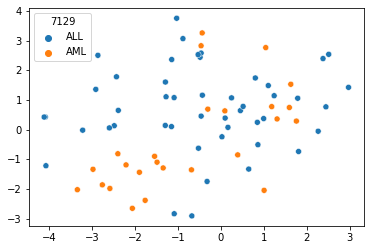

In [33]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y)

# Part d

last 34 records belong to test data

In [24]:
X = df_final.drop(df_final.columns[7129], axis=1)
y = df_final[7129]

In [25]:
X = StandardScaler().fit_transform(X)

In [26]:
X.shape, y.shape

((72, 7129), (72,))

In [27]:
X_train = X[:38, :]
X_test = X[38:, :]
y_train = y[:38] 
y_test = y[38:] 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 7129), (34, 7129), (38,), (34,))

In [28]:
mlp_clf = MLPClassifier(random_state=1).fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')

Test Accuracy: 0.47058823529411764


# Part e

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.shape

(72, 2)

In [30]:
X_train = principalDf.iloc[:38, :]
X_test = principalDf.iloc[38:, :]
y_train = y[:38] 
y_test = y[38:] 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 2), (34, 2), (38,), (34,))

In [31]:
mlp_clf = MLPClassifier(random_state=1).fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')

Test Accuracy: 0.5882352941176471
